<b>Classification learning sandbox </b>-  Uses all data, averages recent matches stats

In [1]:
from Learning import *
from Graphing import *

Load raw dataset & preprocess (fuse sources, add features & global statistics, impute missing values, dummy code categorical variables, return as array)

In [1]:
meta,X,X_rec,Yc,Yr,(meta_labels,X_labels,X_rec_labels,Yc_labels,Yr_labels) = load_games(N=75000, n_occ=5, n_occ_elo=(2000, 35))

Save/load checkpoint (naming format: d_featuresUsed_timestamp)

In [ ]:
# save_ld((meta,X,X_rec,Yc,Yr,(meta_labels,X_labels,X_rec_labels,Yc_labels,Yr_labels)),"d_all")#+str(int(time.time())))

In [2]:
meta,X,X_rec,Yc,Yr,(meta_labels,X_labels,X_rec_labels,Yc_labels,Yr_labels) = load_ld("d_all_") # Load preprocessed data

In [3]:
meta.shape, X.shape, len(X_labels), X_rec[0][0].shape, len(X_rec_labels), Yc.shape, Yr.shape

((72500, 26), (72500, 6558), 6558, (7, 119), 119, (72500, 13), (72500, 160))

Compute recent games n-averages and features (global statistics, in-game performance normalized by the global average for the role/champion/elo rating)

In [4]:
X_rec_labels = add_recent_match_features(X, X_rec, X_labels, X_rec_labels)

72400 / 72500     


In [5]:
X_rec_avgs, X_rec_avgs_labels = get_recent_match_avgs(X, X_rec, X_rec_labels)

72400 / 72500     
72400 / 72500     


In [6]:
X.shape, len(X_labels), X_rec_avgs.shape, len(X_rec_avgs_labels)

((72500, 6558), 6558, (72500, 3150), 3150)

Save/load checkpoint (naming format: dataWithRecentGamesStats_numRecentGamesUsed_featuresUsed_timestampORnumDataUsed)

In [7]:
# save_ld((meta,X,X_rec,X_rec_avgs,Yc,Yr,(meta_labels,X_labels,X_rec_labels,X_rec_avgs_labels,Yc_labels,Yr_labels)),\
#         "d+1,2,4,8,20_all_61k")#+str(int(time.time()))) # Save preprocessed data and extra recent match features & averages

In [8]:
# meta,X,X_rec,X_rec_avgs,Yc,Yr,(meta_labels,X_labels,X_rec_labels,X_rec_avgs_labels,Yc_labels,Yr_labels)=load_ld(\
#         "d+1,2,4,8,20_all_61k")

Combine new recent match averages & features with existing X data array

In [9]:
X, X_labels = np.hstack((X, X_rec_avgs)), X_labels + X_rec_avgs_labels

In [10]:
meta.shape, X.shape, len(X_labels), X_rec[0][0].shape, len(X_rec_labels), Yc.shape, Yr.shape

((72500, 26), (72500, 9708), 9708, (7, 124), 124, (72500, 13), (72500, 160))

Save/load checkpoint (naming format: data_numRecentGamesUsed_featuresUsed_timestampORnumDataUsed)

In [11]:
save_ld((meta,X,X_rec,Yc,Yr,(meta_labels,X_labels,X_rec_labels,Yc_labels,Yr_labels)),"d1,2,4,8,20_all")#+str(int(time.time())))

In [3]:
meta,X,X_rec,Yc,Yr,(meta_labels,X_labels,X_rec_labels,Yc_labels,Yr_labels) = load_ld("d1,2,4,8,20_all") # Load combo

In [4]:
meta.shape, X.shape, len(X_labels), X_rec[0][0].shape, len(X_rec_labels), Yc.shape, Yr.shape

((75000, 26), (75000, 9897), 9897, (0,), 126, (75000, 13), (75000, 160))

Construct balanced dataset

In [18]:
meta, X, Yc, Yr, X_rec = shuffle_data([meta, X, Yc, Yr], X_rec)
meta, X, X_rec, Yc, Yr = get_balanced_dataset(meta, X, X_rec, Yc, Yr, meta_labels, n_dup=5)
meta, X, Yc, Yr, X_rec = shuffle_data([meta, X, Yc, Yr], X_rec)

In [ ]:
meta.shape, X.shape, len(X_labels), X_rec[0][0].shape, len(X_rec_labels), Yc.shape, Yr.shape

Save/load checkpoint (naming format: dataWithRecentGamesStats_numRecentGamesUsed_featuresUsed_timestampORnumDataUsed)

In [19]:
save_ld((meta,X,X_rec,X_rec_avgs,Yc,Yr,(meta_labels,X_labels,X_rec_labels,X_rec_avgs_labels,Yc_labels,Yr_labels)),\
        "db1,2,4,8,20_all")#+str(int(time.time()))) # Save preprocessed data and extra recent match features & averages

In [ ]:
meta,X,X_rec,X_rec_avgs,Yc,Yr,(meta_labels,X_labels,X_rec_labels,X_rec_avgs_labels,Yc_labels,Yr_labels)=load_ld(\
        "db1,2,4,8,20_all")

Shuffle data (do this before removing player duplicates to keep one duplicate randomly)

In [12]:
if "X_rec_avgs" in locals() and X_rec_avgs.size and len(X_rec_avgs) == len(meta):
    meta, X, Yc, Yr, X_rec_avgs, X_rec = shuffle_data([meta, X, Yc, Yr, X_rec_avgs], X_rec)
else:
    meta, X, Yc, Yr, X_rec = shuffle_data([meta, X, Yc, Yr], X_rec)

Remove duplicate players games (so that we have 1 game for 1 player - easier to avoid contamination, todo: full data use)

In [12]:
meta, X, X_rec, Yc, Yr = remove_duplicate_players(meta, X, X_rec, Yc, Yr, meta_labels, elo_limit=None)

In [13]:
meta.shape, X.shape, len(X_labels), X_rec[0][0].shape, len(X_rec_labels), Yc.shape, Yr.shape

((16427, 26), (16427, 6942), 6942, (3, 126), 126, (16427, 13), (16427, 160))

Save/load checkpoint (naming format: filteredData_numRecentGamesUsed_featuresUsed_timestampORnumDataUsed)

In [14]:
save_ld((meta,X,X_rec,Yc,Yr,(meta_labels,X_labels,X_rec_labels,Yc_labels,Yr_labels)),"fd1,2,4,8,20_all_47k")#+str(int(time.time())))

In [2]:
meta,X,X_rec,Yc,Yr,(meta_labels,X_labels,X_rec_labels,Yc_labels,Yr_labels) = load_ld("fd1,2,4,8,20_all_47k") # Load filtered

In [15]:
meta.shape, X.shape, len(X_labels), X_rec[0][0].shape, len(X_rec_labels), Yc.shape, Yr.shape

((16427, 26), (16427, 6942), 6942, (3, 126), 126, (16427, 13), (16427, 160))

Remove redundant features

In [18]:
X, X_labels, X_rec, X_rec_labels = remove_redundant_features(X, X_labels, X_rec, X_rec_labels)

In [34]:
meta.shape, X.shape, len(X_labels), X_rec[0][0].shape, len(X_rec_labels), Yc.shape, Yr.shape

((47504, 26), (47504, 6941), 6941, (20, 126), 126, (47504, 13), (47504, 160))

Shuffle data again to avoid clumping due to fewer players at higher elos

In [6]:
if "X_rec_avgs" in locals() and X_rec_avgs.size and len(X_rec_avgs) == len(meta):
    meta, X, Yc, Yr, X_rec_avgs, X_rec = shuffle_data([meta, X, Yc, Yr, X_rec_avgs], X_rec)
else:
    meta, X, Yc, Yr, X_rec = shuffle_data([meta, X, Yc, Yr], X_rec)

Data normalization/feature scaling

In [13]:
print(Yr.min(), X.min(), Yr.max(), X.max()) # Scale data to between 0 & 1 (remember scaling values)
X_scales = scale_data(X, X_labels)
Yr_scales = scale_data(Yr, Yr_labels)
print(Yr.min(), X.min(), Yr.max(), X.max())

0.0 -662466.787 808610.0 1537762189832.0
0.0 0.0 1.0 1.0


In [15]:
# unscale_data(X, X_labels, X_scales) # Unscale
# unscale_data(Yr, Yr_labels, Yr_scales)
# Yr.max(), X.max() 

Remove game duration (win prediction use case)

In [14]:
X, X_labels = remove_data_subset(X, X_labels, duration_labels)
X.shape

(118850, 9892)

Define experiment models & variables

In [15]:
# scorers = scorers_c
scorers = ["multitask_acc"]

In [16]:
# models = models_c
models = [
#     "AdaBoostClassifier",
#     "MLPClassifier",
#     "LinearSVC"
    "LogisticRegression",
    "RidgeClassifier",
    "LinearDiscriminantAnalysis",
    
#     "DecisionTreeClassifier",
#     "RandomForestClassifier",
#     "GradientBoostingClassifier",
#     "AdaBoostClassifier",
#     "MLPClassifier",
#     "SVMClassifier",
#     "SVMClassifierL1",
#     "SVC",
#     "GaussianProcessClassifier",
#     "KNeighborsClassifier",
#     "LogisticRegression",
#     "LogisticRegressionCV",
#     "LinearSVC"
#     "RidgeClassifier",
#     "RidgeClassifierCV",
#     "LinearDiscriminantAnalysis",
#     "QuadraticDiscriminantAnalysis",
#     "GaussianNB",
]

# Y_labels = Yc_labels_all
Y_labels = ["blue_win"]
# Y_labels = ["blue_win", "blue_first_inhib"]
# Y_labels = ["blue_win", "blue_first_tower", "blue_first_dragon", "blue_first_inhib"]
# Y_labels = ["blue_win", "blue_first_blood", "blue_first_tower", "blue_rift_herald",
#             "blue_first_dragon", "blue_first_baron", "blue_first_inhib"]
# Y_labels_print = ["blue_win", "blue_first_tower", "blue_first_dragon", "blue_first_inhib"]
Y_labels_print = Y_labels

Y = Yc[:, [Yc_labels_all.index(l) for l in Y_labels]]
_X = X

# two_months_ago = (time.time() - (60 * 24.0 * 60.0 * 60.0)) * 1000 # Recent games only filter
# new_is = np.nonzero(X[:, -n_patches-n_seasons-n_regions-3] < two_months_ago)
# Y = Yc[new_is, [Yc_labels_all.index(l) for l in Y_labels]].T
# _X = X[new_is]
# _X = _X[:, :1390]

# Train Multi-task models on interval_size-sample increments of data
interval_size = 5000
ns_samples = [500] + list(np.arange(0, _X.shape[0], interval_size))[1:]# + [ _X.shape[0] ]
# ns_samples = [500, 1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000]
# ns_samples = [500, 5000, 15000, 25000, 35000, 45000]
ns_samples = [110000]

# Take ns_eval_samples samples of random x for each increment, to get accurate results at low n
ns_eval_samples = [1] * len(ns_samples)

# Number of test samples
n_test = 8850 #1919
X_train, Y_train, Yr_train, X_test, Y_test = _X[:-n_test], Y[:-n_test], Yr[:-n_test], _X[-n_test:], Y[-n_test:]
blue_win_perc = 100.0 * np.mean(Y_test[:, 0]) # Check blue win percentage
Y_labels, models, scorers, _X.shape, Y.shape, n_test, ns_samples, ns_eval_samples, blue_win_perc

(['blue_win'],
 ['LogisticRegression', 'RidgeClassifier', 'LinearDiscriminantAnalysis'],
 ['multitask_acc'],
 (118850, 9892),
 (118850, 1),
 8850,
 [110000],
 [1],
 49.34463276836158)

Remove training data games where players significantly underperformed (disconnects/trolls), computed via low xp percentiles

In [72]:
# perc = 0.5
# perf_measure = "xp_10min"
# rem_is = []
# for r in t_roles:
#     val_i = Yr_labels.index(r + '_' + perf_measure)
#     perc_val = np.percentile(Yr_train[:, val_i], perc)
#     rem_is.append(Yr_train[:, val_i] < perc_val)
# rem_is = np.nonzero(np.logical_or.reduce(rem_is))[0]
# X_train = np.delete(X_train, rem_is, axis=0)
# Y_train = np.delete(Y_train, rem_is, axis=0)
# X_train.shape, Y_train.shape

((13348, 5621), (13348, 1))

Filter test data to test prediction for games above an elo skill rating of ```elo_N```

In [17]:
elo_N = 2400
test_is = np.nonzero(meta[2000:, meta_labels.index("elo")] > elo_N)[0]
len(test_is)
# X_test, Y_test = X_test[test_is], Y_test[test_is]
# X_test.shape, Y_test.shape

2644

Fit, train & test models, save result (naming format: predictions_startNumSamples_endNumSamples_numEvalSamples_featuresUsed)

In [2]:
Y_pr = do_learning_curve(X_train, Y_train, X_test, models, ns_samples, ns_eval_samples)
save_ld((X_test,Y_test,Y_pr,Y_labels,models,ns_samples,ns_eval_samples), "preds_" + str(int(time.time())))
# X_test, Y_test, Y_pr, Y_labels, models, ns_samples, ns_eval_samples = load_ld("preds_1535536819")
len(Y_pr), len(Y_pr[-1]), len(Y_pr[-1][-1]), Y_pr[-1][-1][-1].shape

Score models & print/graph scores/learning curves

In [ ]:
scores = score_learning_curve(Y_test, Y_pr, models, ns_samples, ns_eval_samples, scorers)
print(len(scores), len(scores[-1]), len(scores[-1][-1]), len(scores[-1][-1][-1]))
print_learning_curve_scores(models, scorers, scores, Y_labels, ["blue_win"], reduce_func=np.max);# print()
graph_learning_curve(models, scorers, scores, ns_samples, Y_labels, size_factor=0.75, compare_models=True, filename="model_comparison")

In [3]:
scores = score_learning_curve(Y_test, Y_pr, models, ns_samples, ns_eval_samples, scorers)
print(len(scores), len(scores[-1]), len(scores[-1][-1]), len(scores[-1][-1][-1]))
print_learning_curve_scores(models, scorers, scores, Y_labels, ["blue_win"], reduce_func=np.max);# print()
graph_learning_curve(models, scorers, scores, ns_samples, Y_labels, size_factor=0.75, compare_models=True, filename="model_comparison")

In [ ]:
# 6 1 1 1
# 	AdaBoostClassifier
# 'multitask_acc: [0.938]'
# 	MLPClassifier
# 'multitask_acc: [0.895]'
# 	LogisticRegression
# 'multitask_acc: [0.897]'
# 	RidgeClassifier
# 'multitask_acc: [0.917]'
# 	LinearDiscriminantAnalysis
# 'multitask_acc: [0.884]'
# 	LinearSVC
# 'multitask_acc: [0.906]'

3 1 9 5
	AdaBoostClassifier
'multitask_acc: [0.819, 0.843, 0.875, 0.892, 0.901, 0.906, 0.906, 0.909, 0.915]'
	MLPClassifier
'multitask_acc: [0.768, 0.792, 0.811, 0.836, 0.851, 0.864, 0.861, 0.868, 0.87]'
	LogisticRegression
'multitask_acc: [0.857, 0.861, 0.868, 0.876, 0.886, 0.887, 0.895, 0.898, 0.904]'


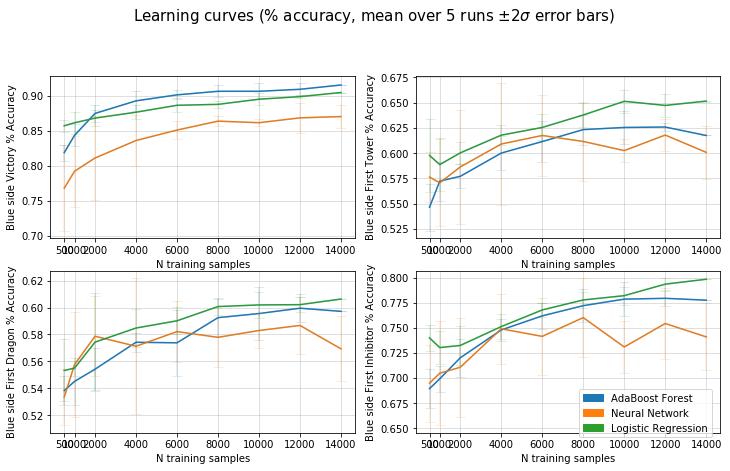

In [18]:
scores = score_learning_curve(Y_test, Y_pr, models, ns_samples, ns_eval_samples, scorers)
print(len(scores), len(scores[-1]), len(scores[-1][-1]), len(scores[-1][-1][-1]))
print_learning_curve_scores(models, scorers, scores, Y_labels, ["blue_win"]);# print()
graph_learning_curve(models, scorers, scores, ns_samples, Y_labels, size_factor=0.75, compare_models=True, filename="model_comparison")

	AdaBoostClassifier
('multitask_acc: [0.86, 0.891, 0.897, 0.901, 0.903, 0.913, 0.91, 0.918, 0.918, '
 '0.914, 0.919, 0.92, 0.92, 0.922, 0.923, 0.92, 0.92, 0.923, 0.923, 0.924]')
	MLPClassifier
('multitask_acc: [0.87, 0.882, 0.884, 0.894, 0.906, 0.906, 0.909, 0.905, '
 '0.907, 0.914, 0.913, 0.918, 0.917, 0.922, 0.925, 0.919, 0.924, 0.922, 0.918, '
 '0.927]')
	LogisticRegression
('multitask_acc: [0.906, 0.909, 0.908, 0.915, 0.913, 0.925, 0.919, 0.92, '
 '0.917, 0.927, 0.925, 0.928, 0.931, 0.93, 0.933, 0.931, 0.935, 0.935, 0.935, '
 '0.935]')


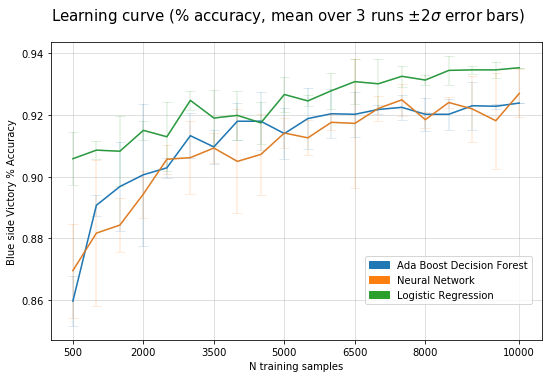

In [8]:
scores = score_learning_curve(Y_test, Y_pr, models, ns_samples, ns_eval_samples, scorers)
print_learning_curve_scores(models, scorers, scores, Y_labels, ["blue_win"]);# print()
graph_learning_curve(models, scorers, scores, ns_samples, Y_labels, size_factor=0.55, compare_models=True, filename="model_comparison", incl_Y=["blue_win"])

	AdaBoostClassifier
('multitask_acc: [0.644, 0.726, 0.79, 0.814, 0.829, 0.846, 0.854, 0.857, '
 '0.865, 0.874, 0.868, 0.871, 0.875, 0.871, 0.878, 0.882, 0.882, 0.883, 0.887, '
 '0.885, 0.886, 0.893, 0.889, 0.892, 0.892, 0.893, 0.892, 0.897, 0.897, 0.897, '
 '0.897, 0.9, 0.896, 0.899, 0.898, 0.901, 0.904, 0.9, 0.903, 0.905]')
	MLPClassifier
('multitask_acc: [0.746, 0.797, 0.792, 0.797, 0.829, 0.848, 0.855, 0.857, '
 '0.872, 0.863, 0.862, 0.867, 0.873, 0.872, 0.871, 0.875, 0.873, 0.874, 0.878, '
 '0.88, 0.882, 0.883, 0.882, 0.877, 0.887, 0.885, 0.881, 0.882, 0.887, 0.888, '
 '0.886, 0.887, 0.889, 0.89, 0.894, 0.892, 0.893, 0.892, 0.9, 0.892]')
	LogisticRegression
('multitask_acc: [0.827, 0.883, 0.886, 0.898, 0.899, 0.899, 0.904, 0.904, '
 '0.901, 0.904, 0.906, 0.903, 0.906, 0.909, 0.908, 0.909, 0.91, 0.91, 0.909, '
 '0.909, 0.908, 0.909, 0.911, 0.911, 0.911, 0.913, 0.913, 0.91, 0.91, 0.911, '
 '0.913, 0.911, 0.911, 0.913, 0.911, 0.913, 0.913, 0.912, 0.914, 0.914]')


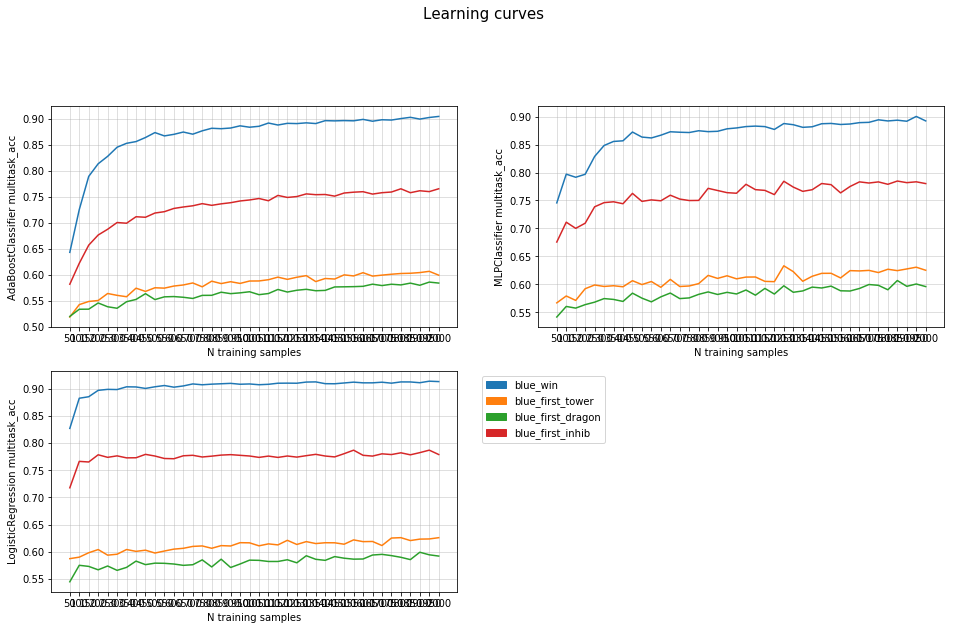

In [16]:
scores = score_learning_curve(Y_test, Y_pr, models, ns_samples, ns_eval_samples, scorers)
print_learning_curve_mean_scores(models, scorers, scores, Y_labels, ["blue_win"]);# print()
graph_learning_curve(models, scorers, scores, ns_samples, Y_labels_print)

	RandomForestClassifier
'multitask_acc: [0.511, 0.508, 0.509, 0.51, 0.512]'
'f1_score: [0.442, 0.439, 0.438, 0.444, 0.446]'
'recall_score: [0.388, 0.387, 0.383, 0.392, 0.393]'
'precision_score: [0.513, 0.509, 0.51, 0.512, 0.514]'
	MLPClassifier
'multitask_acc: [0.516, 0.515, 0.517, 0.518, 0.518]'
'f1_score: [0.517, 0.521, 0.515, 0.516, 0.515]'
'recall_score: [0.521, 0.53, 0.514, 0.515, 0.512]'
'precision_score: [0.515, 0.514, 0.516, 0.517, 0.517]'


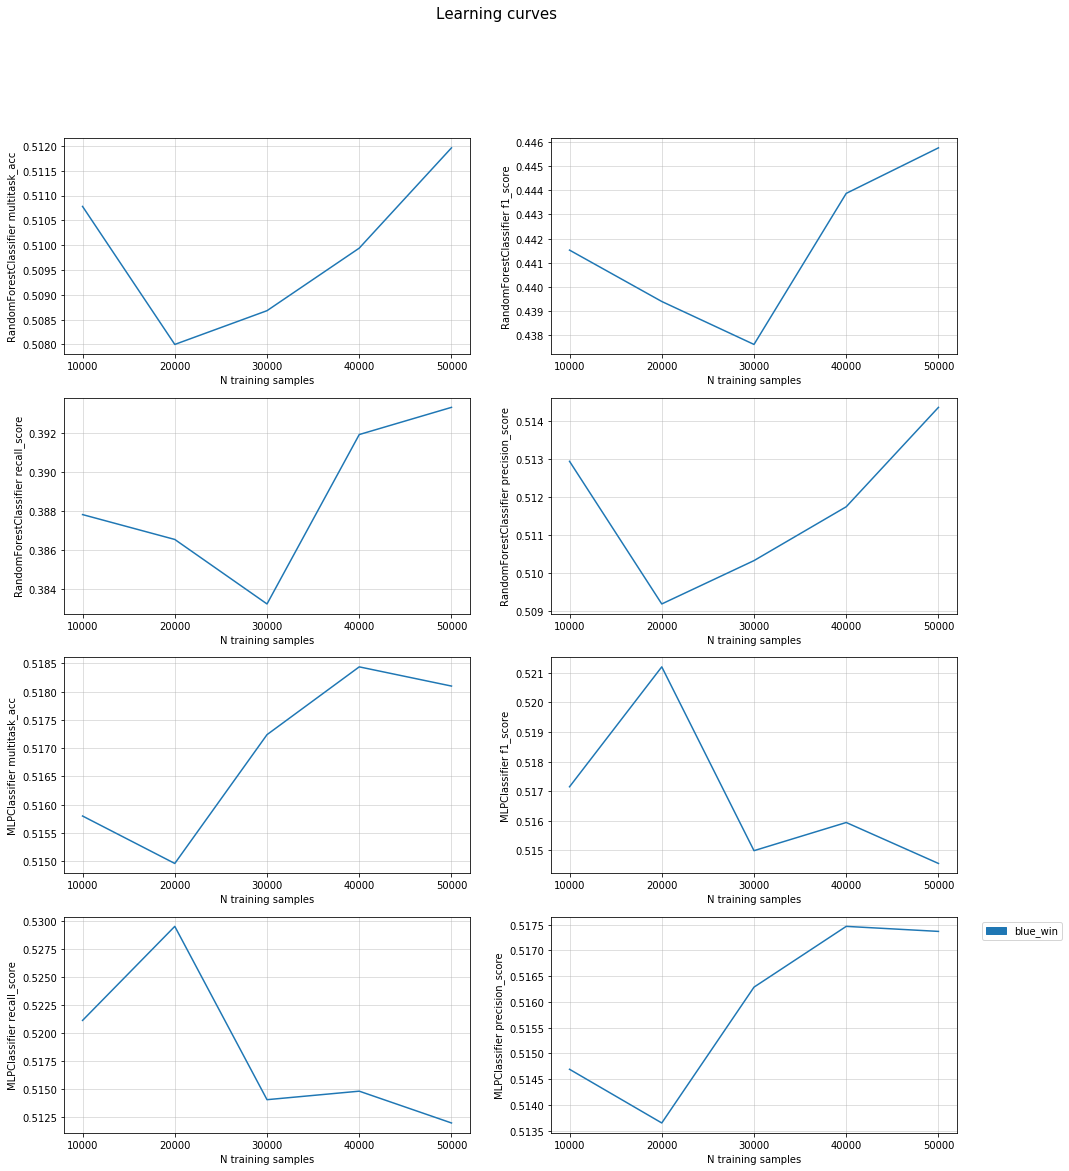

In [14]:
scores = score_learning_curve(Y_test, Y_pr, models, ns_samples, ns_eval_samples, scorers)
print_learning_curve_scores(models, scorers, scores, Y_labels, ["blue_win"]);# print()
graph_learning_curve(models, scorers, scores, ns_samples, Y_labels)

In [12]:
# For debug: convert x data into random numbers & try to learn
# X = np.random.random((X.shape[0], 2))
# Y_pr = do_cv_learning_curve(X, Y, models, ns_samples, ns_eval_samples, cv=3) # Result includes sample indices used
# scores = score_learning_curve(Y, Y_pr, models, ns_samples, ns_eval_samples, scorers)
# print_learning_curve_mean_scores(models, scorers, scores, Y_labels, ["blue_win"]); print()
# graph_learning_curve(models, scorers, scores, ns_samples, Y_labels)

In [28]:
# Undo adding extra recent match features/averages
# X_rec_avgs_labels = X_labels[X_labels.index("season_losses") + 1:]
# X_labels = X_labels[:len(X_labels) - len(X_rec_avgs_labels)]
# X = X[:, range(len(X_labels))]
# for game_i in range(len(X)):
#     for i in N_PL_r:
#         if X_rec[game_i][i].shape[0] > 1:
#             X_rec[game_i][i] = X_rec[game_i][i][:, :-len(new_X_rec_labels)]
# X_rec_labels = X_rec_labels[:-len(new_X_rec_labels)]
# X.shape, len(X_labels), X_rec[0][0].shape, len(X_rec_labels)

In [29]:
count = 0
for i in range(len(X)):
    for r in t_roles:
        a, b = X[i, X_labels.index(r + "_opgg_rs_division")], X[i, X_labels.index(r + "_division")]
#         if a != b:
        if abs(a - b) > 1.5:
#             print(a, b)
            count +=1 
count, len(X) * 10, 100 * (count / (len(X) * 10))

(2612, 23130, 11.2926934716818)

In [21]:
i = 15
x, y = Yr[i, Yr_labels.index("blue_top_total_time_crowd_control_dealt")], \
    Yr[i, Yr_labels.index("blue_top_time_ccing_others")]
x, y, x/y

(1181.0, 40.0, 29.525)

In [24]:
{**{'a':2},**{'b':4}}

SyntaxError: invalid syntax (<ipython-input-24-11f3754a9750>, line 1)

In [46]:
np.pad(np.atleast_2d(X_rec[6][0]), [(0, 2), (0, 0)], "constant")

array([], shape=(3, 0), dtype=float64)

In [3]:
from test_requests import *

In [4]:
a = test(url + "/summary/" + summoner + "/")

In [10]:
print(a['data']["games"][0].keys())

dict_keys(['type', 'timestamp', 'length', 'result', 'champion', 'championImage', 'spell1', 'spell1Image', 'spell2', 'spell2Image', 'kills', 'deaths', 'assists', 'ratio', 'level', 'cs', 'csps', 'pinksPurchased', 'killParticipation', 'items', 'team1', 'team2'])


In [7]:
b = test(url + "/summary/" + summoner + "/ranked")

In [11]:
print(b['data']["games"][0].keys())

dict_keys(['type', 'timestamp', 'length', 'result', 'champion', 'championImage', 'spell1', 'spell1Image', 'spell2', 'spell2Image', 'kills', 'deaths', 'assists', 'ratio', 'level', 'cs', 'csps', 'pinksPurchased', 'killParticipation', 'items', 'team1', 'team2'])


In [3]:
[l for l in X_labels_all if "matchup_" in l]

['blue_top_chgg_elo_avg_matchup_games',
 'blue_top_chgg_elo_avg_matchup_wins',
 'blue_top_chgg_elo_avg_matchup_win_rate',
 'blue_top_chgg_elo_avg_matchup_kills',
 'blue_top_chgg_elo_avg_matchup_deaths',
 'blue_top_chgg_elo_avg_matchup_assists',
 'blue_top_chgg_elo_avg_matchup_gold',
 'blue_top_chgg_elo_avg_matchup_creep_score',
 'blue_top_chgg_elo_avg_matchup_total_damage_dealt_to_champions',
 'blue_top_chgg_elo_avg_matchup_kill_sprees',
 'blue_top_chgg_elo_avg_matchup_jungle_creep_score_team',
 'blue_top_chgg_elo_avg_matchup_weighed_score',
 'blue_jungle_chgg_elo_avg_matchup_games',
 'blue_jungle_chgg_elo_avg_matchup_wins',
 'blue_jungle_chgg_elo_avg_matchup_win_rate',
 'blue_jungle_chgg_elo_avg_matchup_kills',
 'blue_jungle_chgg_elo_avg_matchup_deaths',
 'blue_jungle_chgg_elo_avg_matchup_assists',
 'blue_jungle_chgg_elo_avg_matchup_gold',
 'blue_jungle_chgg_elo_avg_matchup_creep_score',
 'blue_jungle_chgg_elo_avg_matchup_total_damage_dealt_to_champions',
 'blue_jungle_chgg_elo_avg_ma